In [2]:
import os
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
pl.rcParams['ytick.labelsize'] = 'large'
pl.rcParams['xtick.labelsize'] = 'large'

In [4]:
df = pd.read_csv(f"/Users/takuto/iriki/GJ1214/A_data/sa.txt", delimiter=' ', parse_dates=True)
df.head(3)

,TIME,FLUX,O_FLUX,C_FLUX,AIRMASS,RELATIVE
0,2.455788e+06,0.987535,1497927.0,1516834.0,1.262582,0.999769
1,2.455788e+06,0.987399,1497730.0,1516843.0,1.263120,0.999627
2,2.455788e+06,0.992114,1502231.0,1514171.0,1.263678,1.004396


In [5]:
len(df)

174

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


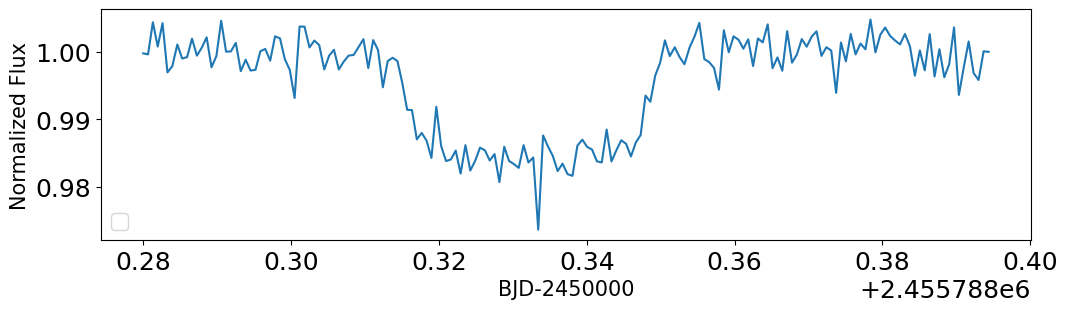

In [6]:
fig,ax = pl.subplots(1,1,figsize=(12,3),sharex=True)

time = df['TIME']
flux = df['RELATIVE']

ax.plot(time, flux)

#add plot labels
ax.set_xlabel('BJD-2450000')
ax.set_ylabel('Normalized Flux')
ax.legend(loc='lower left')

In [8]:
from pytransit import MandelAgol

def transit_model_q(parameters, fix, time, model=MandelAgol()):
 
    k_d,tc_d,k_e,tc_e = parameters
    p_d,a_d,b_d,p_e,a_e,b_e,q1_,q2_ = fix
    
    #compute inclination
    inc_d   = np.arccos(b_d/a_d)
    inc_e   = np.arccos(b_e/a_e)
    #convert q to u
    u1,u2 = q_to_u(q1_, q2_)
    #evaluate the model
    m = 1-(1-model.evaluate(time, k_d, (u1,u2), tc_d, p_d, a_d, inc_d))-(1-model.evaluate(time, k_e, (u1,u2), tc_e, p_e,a_e, inc_e))
    
    return m

OSError: Could not find/load shared object file

In [6]:
import numpy as np
a = np.cos(60)
print(a)

-0.9524129804151563


In [14]:
import batman
from adyropy import units as u
time = np.array(df['TIME'])
flux = df['RELATIVE']
params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0.                        #time of inferior conjunction
params.per = 1.580404531                       #orbital period
params.rp = 2.733 * u.Rearth.to(u.Rsun)                        #planet radius (in units of stellar radii)
params.a = 0.01505 * u.ac                        #semi-major axis (in units of stellar radii)
params.inc = 90.                      #orbital inclination (in degrees)
params.ecc = 0.0062                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.limb_dark = "quadratic"        #limb darkening model
params.u = [0.088, 0.404]      #limb darkening coefficients [u1, u2, u3, u4]

 #times at which to calculate light curve
m = batman.TransitModel(params, time)    #initializes model
model_flux = m.light_curve(params)

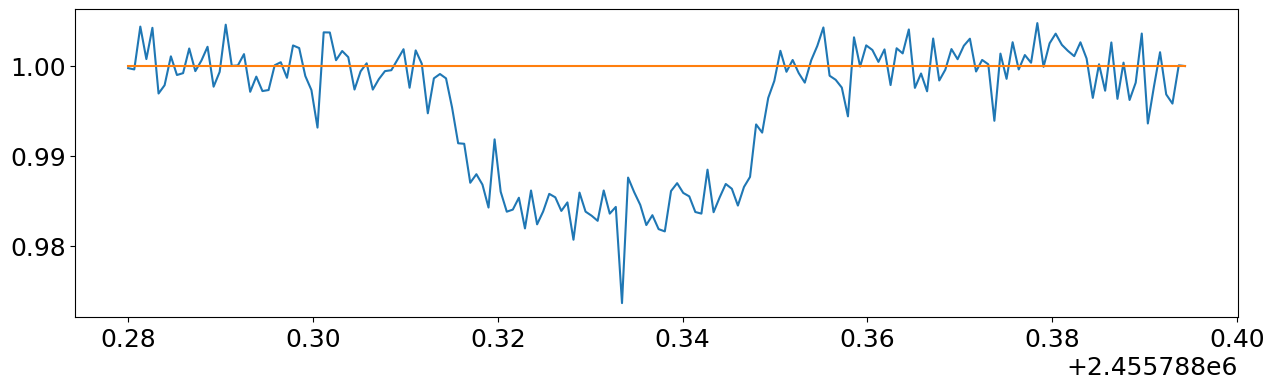

In [15]:
fig,ax = pl.subplots(1,1,figsize=(15,4),sharex=True)
time = df['TIME']
flux = df['RELATIVE']

ax.plot(time, flux)
ax.plot(time,model_flux)